In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



#  Import and read the sales data
url = 'https://raw.githubusercontent.com/rbono22/Retail_Analysis/main/Resources/cleaned_datasets/sales_data_clean.csv'
sales_df = pd.read_csv(url, index_col=0)
sales_df.head()

,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,1,02/05/2010,24924.50,False
1,1,02/12/2010,46039.49,True
1,1,02/19/2010,41595.55,False
1,1,02/26/2010,19403.54,False
1,1,03/05/2010,21827.90,False


In [2]:
#  Import and read the store data
url = 'https://raw.githubusercontent.com/rbono22/Retail_Analysis/main/Resources/cleaned_datasets/stores_data_clean.csv'
store_df = pd.read_csv(url, index_col=0)
store_df.head()

,Type,Size
Store,,
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875


In [3]:
#Merge both dataframes
store_sale_df = pd.merge(sales_df,store_df,on='Store')
store_sale_df

,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
Store,,,,,,
1,1,02/05/2010,24924.50,False,A,151315
1,1,02/12/2010,46039.49,True,A,151315
1,1,02/19/2010,41595.55,False,A,151315
1,1,02/26/2010,19403.54,False,A,151315
1,1,03/05/2010,21827.90,False,A,151315
...,...,...,...,...,...,...
45,98,09/28/2012,508.37,False,B,118221
45,98,10/05/2012,628.10,False,B,118221
45,98,10/12/2012,1061.02,False,B,118221


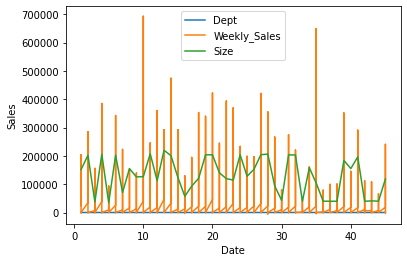

In [4]:
# Plot the data

store_sale_df.plot()

plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

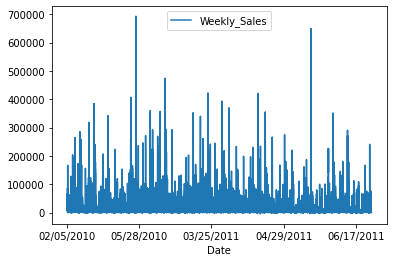

In [5]:
store_sale_df.plot.line(x='Date', y='Weekly_Sales')

In [6]:
#Overview of df

# Ale's model

In [7]:
# Drop unnecesary variables
store_sale_df = store_sale_df.drop(['Dept', 'Type', 'Size'], axis=1) 

# encoding isHoliday column
store_sale_df['IsHoliday'] = [1 if l else 0 for l in store_sale_df['IsHoliday'].values] 

 # Seperate by store
store_sale_df['Store'] = store_sale_df.index 

#reset index
store_sale_df = store_sale_df.reset_index(drop=True)
store_sale_df 

,Date,Weekly_Sales,IsHoliday,Store
0,02/05/2010,24924.50,0,1
1,02/12/2010,46039.49,1,1
2,02/19/2010,41595.55,0,1
3,02/26/2010,19403.54,0,1
4,03/05/2010,21827.90,0,1
...,...,...,...,...
421565,09/28/2012,508.37,0,45
421566,10/05/2012,628.10,0,45
421567,10/12/2012,1061.02,0,45
421568,10/19/2012,760.01,0,45


# Per store regression model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

In [9]:
#copy the original df 
masked = store_sale_df.copy()

In [10]:
# manually standerdize the weekly_sales per store 
for store in masked['Store'].unique():
  another = (masked['Store'] == store)
  masked.loc[another, 'Weekly_Sales'] = (masked.loc[another, 'Weekly_Sales'] - masked.loc[another, 'Weekly_Sales'].mean()) / masked.loc[another, 'Weekly_Sales'].std()
masked

,Date,Weekly_Sales,IsHoliday,Store
0,02/05/2010,0.115823,0,1
1,02/12/2010,0.876752,1,1
2,02/19/2010,0.716604,0,1
3,02/26/2010,-0.083138,0,1
4,03/05/2010,0.004229,0,1
...,...,...,...,...
421565,09/28/2012,-0.792477,0,45
421566,10/05/2012,-0.783971,0,45
421567,10/12/2012,-0.753214,0,45
421568,10/19/2012,-0.774599,0,45


In [11]:
# create the month, day, year and month_day columns
masked['Month'] = masked.Date.apply(lambda x: x.split('/')[0])
masked['Day'] = masked.Date.apply(lambda x: x.split('/')[1])
masked['Month_day'] = masked.Date.apply(lambda x: str(x.split('/')[:-1]))
masked['Year'] = masked.Date.apply(lambda x: x.split('/')[2])
masked

,Date,Weekly_Sales,IsHoliday,Store,Month,Day,Month_day,Year
0,02/05/2010,0.115823,0,1,02,05,"['02', '05']",2010
1,02/12/2010,0.876752,1,1,02,12,"['02', '12']",2010
2,02/19/2010,0.716604,0,1,02,19,"['02', '19']",2010
3,02/26/2010,-0.083138,0,1,02,26,"['02', '26']",2010
4,03/05/2010,0.004229,0,1,03,05,"['03', '05']",2010
...,...,...,...,...,...,...,...,...
421565,09/28/2012,-0.792477,0,45,09,28,"['09', '28']",2012
421566,10/05/2012,-0.783971,0,45,10,05,"['10', '05']",2012
421567,10/12/2012,-0.753214,0,45,10,12,"['10', '12']",2012
421568,10/19/2012,-0.774599,0,45,10,19,"['10', '19']",2012


In [12]:
# get the mean weekly sales across years for each store independently
masked1 = masked.groupby(['Month_day', 'Store']).agg({'Weekly_Sales': np.mean, 'IsHoliday': np.mean}).reset_index()

# Limit the amount of month days we want to see
#masked1 = masked1[masked1['Month_day'].isin(masked1['Month_day'].unique()[:50])]
masked1

,Month_day,Store,Weekly_Sales,IsHoliday
0,"['01', '06']",1,-0.006401,0
1,"['01', '06']",2,-0.057584,0
2,"['01', '06']",3,-0.010631,0
3,"['01', '06']",4,-0.032085,0
4,"['01', '06']",5,-0.012368,0
...,...,...,...,...
6430,"['12', '31']",41,-0.160478,1
6431,"['12', '31']",42,-0.137297,1
6432,"['12', '31']",43,-0.086028,1
6433,"['12', '31']",44,-0.094121,1


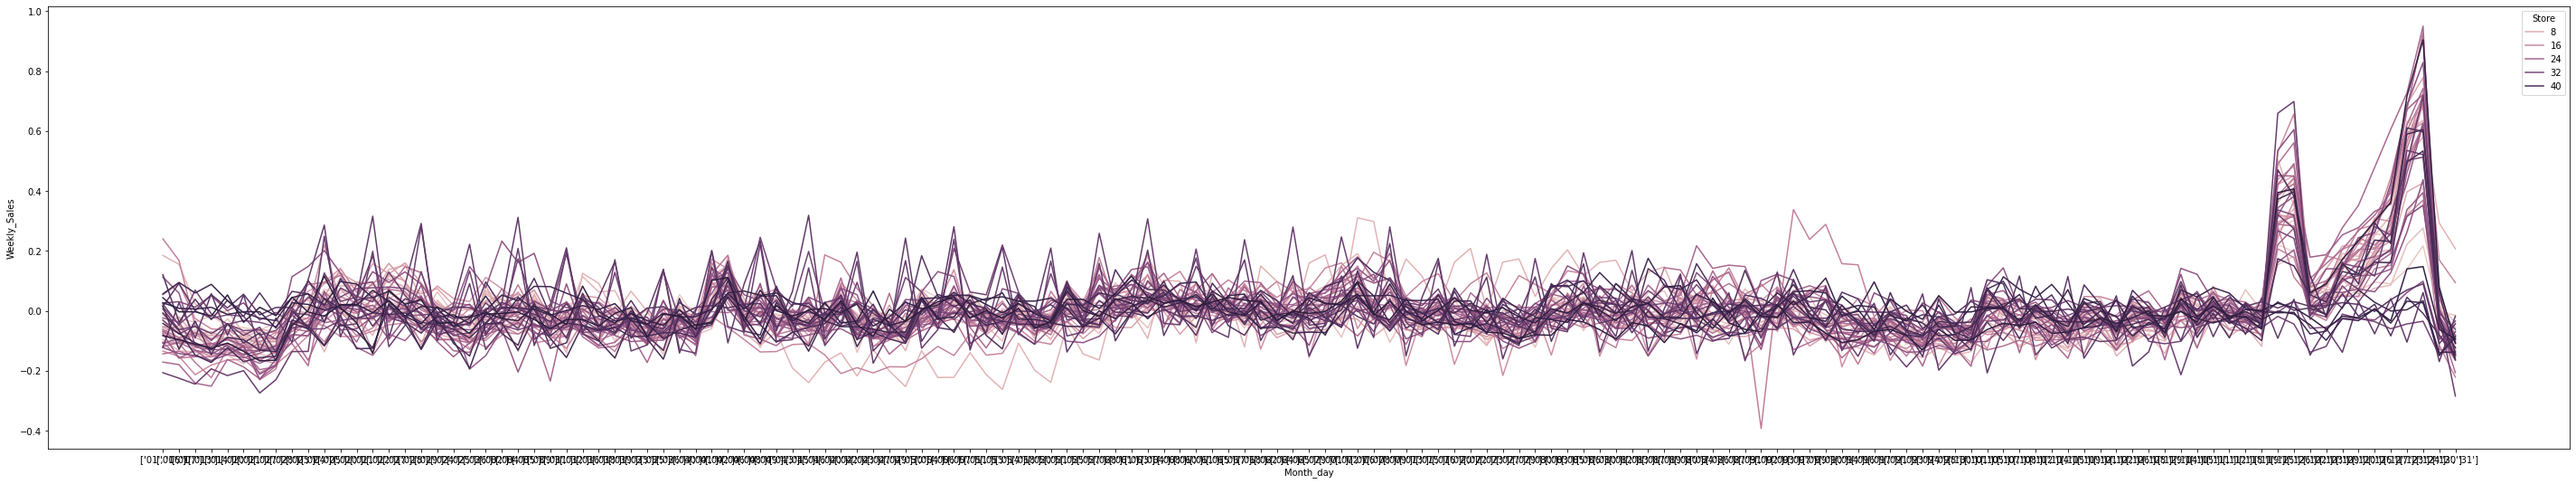

In [13]:
# plot the figure
plt.figure(figsize=(50, 9))
sns.lineplot(data=masked1, x='Month_day', y='Weekly_Sales', hue='Store')
plt.show()

In [14]:
# The preprocessing and model pipelines - categorical pipeline? would it have an effect??
pipe_ada = Pipeline(steps=[('pre', OrdinalEncoder()), ('clf', AdaBoostRegressor())])
pipe_rf = Pipeline(steps=[('pre', OrdinalEncoder()), ('clf', RandomForestRegressor())])


In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
        masked1[['Month_day', 'IsHoliday']],
        masked1['Weekly_Sales'], test_size=0.33, random_state=42
    )

In [16]:
# See the accuracy
for pipe, name in zip([pipe_ada, pipe_rf], ['ada', 'RF']):

  print(name)

  model = pipe.fit(X_train, y_train)

  y_pred = model.predict(X_train)

  print(r2_score(y_train.values.reshape(-1, 1), y_pred.reshape(-1, 1)))

ada
0.4784137923678091
RF
0.5796206518963426
